# California House Price with Linear Regression 

In [38]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
cl= fetch_california_housing()
print(cl.data.shape)

(20640, 8)


 Converting data from nd-array to data frame and adding feature names to the data 

In [15]:
df= pd.DataFrame(data= cl.data, columns= cl.feature_names)
df['MedHouseVal']= cl.target

In [16]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


 Description of California dataset 

In [17]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


info of California dataset

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Getting input and output data and further splitting data to training and testing dataset.

In [24]:
# Input Data
x= df.drop('MedHouseVal', axis= 1)
#output Data
y= df['MedHouseVal']
# splitting data to training and testing dataset. 
x_train, x_test, y_train, y_test= train_test_split(x, y,
                                                   test_size= 0.4,
                                                   random_state= 40)
print("x train shape : ", x_train.shape)
print("x test shape  : ", x_test.shape)
print("y train shape : ", y_train.shape)
print("y test shape  : ", y_test.shape)

x train shape :  (12384, 8)
x test shape  :  (8256, 8)
y train shape :  (12384,)
y test shape  :  (8256,)


Applying Linear Regression Model to the dataset and predicting the prices. 

In [26]:
# Fitting Multi Linear regression model to training model
reg_model= LinearRegression()
reg_model.fit(x_train, y_train)
# predicting the test set results
y_pred= reg_model.predict(x_test)

Plotting Scatter graph to show the prediction results ‘y_true’ value vs ‘y_pred’ value.

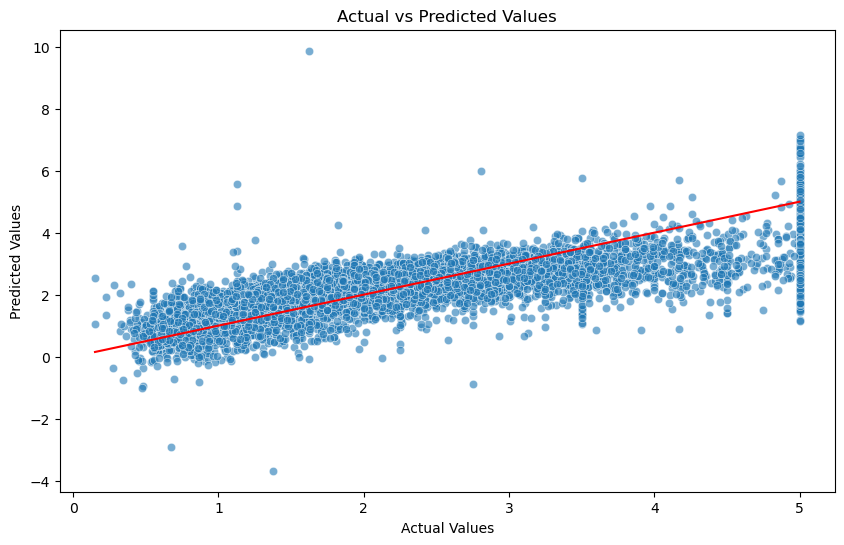

In [35]:
# Plotting Scatter graph to show the prediction 
# results - 'y_true' value vs 'y_pred' value
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='red')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

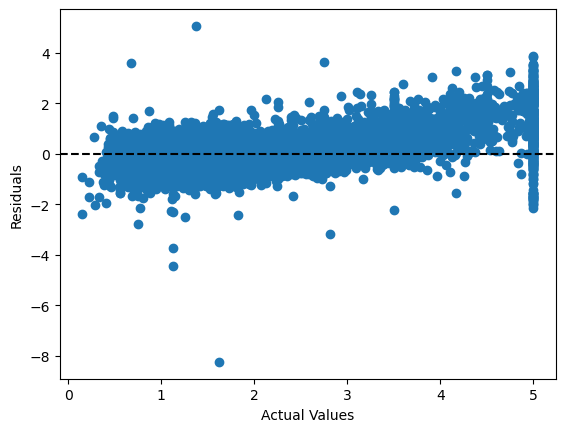

In [36]:
residuals = y_test - y_pred

# Plot residuals vs actual values
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

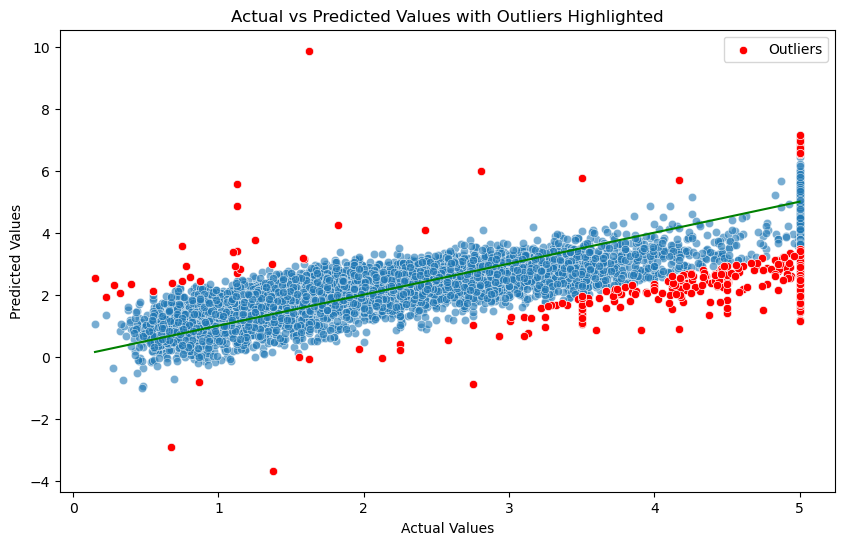

In [37]:
# Define a threshold for outliers
threshold = np.percentile(abs(y_test - y_pred), 95)  # Adjust based on your criteria

# Plot with outliers highlighted
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
sns.scatterplot(x=y_test[abs(y_test - y_pred) > threshold], y=y_pred[abs(y_test - y_pred) > threshold], color='red', label='Outliers')
sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='green')
plt.title('Actual vs Predicted Values with Outliers Highlighted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

Results of Linear Regression i.e. Mean Squared Error and Mean Absolute Error.

In [39]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("Mean Square Error : ", mse)
print("Mean Absolute Error : ", mae)

Mean Square Error :  0.5482901948661025
Mean Absolute Error :  0.5387366720874109


Here are a few further steps on how you can improve your model.

- Feature Selection
- Cross-Validation
- Hyperparameter Tuning
